In this project, we will be using numerical method to solve the one-dimensional time independent Schrodinger equation given by:

$$-\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x)$$

Where:
- ${\hbar}$ is the reduced Planck's constant,
- ${\psi(x)}$ is the wavefunction,
- $m$ is mass of particle 
- $V(x)$ is potential energy,
- $E$ is total energy.


The Schrodinger Equation can also be rewritten in the form of second order linear differential equation:

$$\psi''(x) = -\frac{2m}{\hbar^2} [E - V(x)] \psi(x)$$

We can simplify the equation above and rewrite it as:

$$\psi''(x) = k^2 \psi(x)$$

where $k^2 = -\frac{2m}{\hbar^2} [E - V(x)]$ . 

<b> Numerov Method </b>

Numerov method is a finite difference method which involves discretizing the whole domain, and integrating step-by-step to obtain the shape of the wavefunction. Usually, we will use the three point finite difference to approximate the second derivative of the wavefunction, using this approximation, we are able to solve the shape of the wavefunction iteratively, 

$$\psi''(x) = \frac{(\psi(x_{i+1}) - 2\psi(x_{i}) + \psi(x_{i-1}))}{dx^2}$$

Numerov's method take this method one step further by considering the fourth derivative of the wavefunction, which leads to errors on the sixth order. The approximation of the wavefunction's second derivative becomes,

$$\psi''(x) = \frac{\psi(x_{i+1}) - 2\psi(x_{i}) + \psi(x_{i-1})}{dx^2}   + \frac{1}{12} (k^2(x_{i+1})\psi(x_{i+1}) - 2k^2(x_{i+1})\psi(x_{i}) + k^2(x_{i+1})\psi(x_{i-1}))$$

which leads to the iterative solution of wavefunction to be,

$$\psi(x_{i+1}) = \frac{\psi(x_{i})(2+\frac{10dx^2}{12}k^2(x_{i})) - \psi(x_{i-1})(1-\frac{dx^2}{12}k^2(x_{i-1}))}{1-\frac{dx^2}{12}k^2(x_{i+1})}$$

where $dx$ is the stepsize, also commonly known as $h$.


<b> Turning Points </b>

If we draw a horizontal line representing an energy level,across the potential well, the interception between the horizontal line and the potential well is defined as the turning points, $a$ and $b$. To determine the turning points, we can use root finding algorithm such as the bisection method.

Given a potential well of,

$$V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda-1)[\frac{1}{2}-\frac{1}{cosh^2(\alpha x)}]$$

where $\alpha$ and $\lambda$ are the parameters of the potential well. 
For now, we will use $\alpha = 1$ and $\lambda = 4$.(For simplicity, we will  use $\hbar=1$ and $m=1$.)

and an Energy level of $E = 2.0$. (This is just a trial energy level to determine the turning points, its not neccesarily an eigenvalue.) 

In [2]:
import numpy as np

hbar = 1
m = 1
alpha = 1
lam = 4
N = 1000
L = 5
tol=1e-6
x = np.linspace(-L,L,N+1)
dx = x[1] - x[0] #stepsize

def V(x):
    return hbar**2*alpha**2*lam*(lam-1)/(2*m)*(1/2-1/np.cosh(alpha*x)**2)

Etest = 2.0

def g(x,E):
    return E-V(x)

def bisection(E,a,b): #Bisection method
    while abs(a-b)>tol:
        c = (a+b)/2
        if g(a,Etest)*g(c,Etest)<0:
            b=c
        else:
            a=c
    return c

print(bisection(Etest,-L,0))
print(bisection(Etest,0,L))


-1.5444844961166382
1.5444844961166382


We can also use the built in fsolve in scipy.optimize to obtain the turning points(which gives us the same result).

In [3]:
from scipy.optimize import fsolve

a=fsolve(g,-L,args=(Etest))
b=fsolve(g,L,args=(Etest))
print(a,b)

[1.54448495] [-1.54448495]


C:\Users\aayma\AppData\Local\Temp\ipykernel_22100\1314739755.py:14: RuntimeWarning: overflow encountered in square
  return hbar**2*alpha**2*lam*(lam-1)/(2*m)*(1/2-1/np.cosh(alpha*x)**2)


Now lets plot the potential well and the energy.

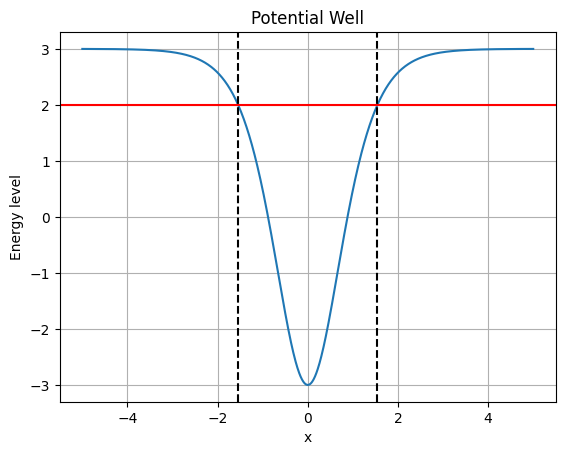

In [4]:
import matplotlib.pyplot as mpl
mpl.plot(x,V(x))
mpl.axhline(Etest, color='r')
mpl.axvline(a, color='k', linestyle='--')
mpl.axvline(b, color='k', linestyle='--')
mpl.xlabel('x')
mpl.ylabel('Energy level')
mpl.title('Potential Well')
mpl.grid()
mpl.show()

Now to solve the eigenvalue problem, we should note that for a given particle confined by the potential well, there are 2 conditions that must be satisfied:
 1) $\psi(x)\rightarrow0$ as $|x|\rightarrow \infty$ must be satisfied for the wavefunction to be normalised and to satisfy physical and mathematical constraint. So, to ensure that this condition is fulfilled, we will be obtaining the wavefunction using Numerov method from left to right, $\psi_{l}$ and right to left, $\psi_{r}$ of the domain. 

 2) Boundary condition between $\psi_{l}$ and $\psi_{r}$ must be satisfied at one of the turning points $a$ or $b$.

 $$\psi_{l}(a) = \psi_{r}(a)$$

 $$\psi_{l}'(a) = \psi_{r}'(a)$$

 The energy and its corresponding wavefunction that satisfy these boundary conditions are known as eigenvalues.

 Combining those two conditions, and using the three point finite difference of the first order, we obtain this equation:

 $$f(E) = \frac{[\psi_{l}(a+dx)-\psi_l(a-dx)]-[\psi_{r}(a+dx)-\psi_{r}(a-dx)]}{2dx\psi(a)} = 0$$

Which is again, a root finding problem, so we can use any root finding algorithm to find the eigenvalue. I will again use bisection method to find the eigenvalue.

In [5]:
def k(x,E):
    return -2*m*(E-V(x))/hbar**2

def Numerov_Iteration(x,E):
    psi=np.zeros(len(x))
    psi[0] = 0
    psi[1] = 1e-10
    for i in range(1,len(x)-1):
        psi[i+1] = ((2+10/12*(dx**2*k(x[i],E)))*psi[i] -
                    (1-1/12*(dx**2*k(x[i-1],E)))*psi[i-1])/(1-1/12*(dx**2*k(x[i+1],E)))
    return psi 

def Numerov_full(E):
    a = fsolve(g,-L,args=(E))
    xr = np.arange(L, a, -dx)
    xl = np.arange(-L, a, dx)
    psir = Numerov_Iteration(xr,E)
    psil = Numerov_Iteration(xl,E)
    
    psil_aplusdx = ((2+10/12*(dx**2*k(xl[-1],E)))*psil[-1] -
               (1-1/12*(dx**2*k(xl[-2],E)))*psil[-2])/(1-1/12*(dx**2*k(a+dx,E)))
    psir_aminusdx= ((2+10/12*(dx**2*k(xr[-1],E)))*psir[-1] -
               (1-1/12*(dx**2*k(xr[-2],E)))*psir[-2])/(1-1/12*(dx**2*k(a-dx,E)))
    
    return psil, psir, psil_aplusdx, psir_aminusdx

def f(E):
    psil, psir, psil_aplusdx, psir_aminusdx = Numerov_full(E)
    return ((psil_aplusdx - psil[-2]) - (psir[-2] - psir_aminusdx))/(2*dx*psir[-1])

#Bisection method for finding eigenvalues
def bisection_eigen(E1,E2):
    while abs(E1-E2)>tol:
        E_eigen = (E1+E2)/2
        if f(E1)*f(E_eigen)<0:
            E2=E_eigen
        else:
            E1=E_eigen
    return E_eigen

print("Using Bisection Method:")
print(round(bisection_eigen(-2,-1),2))
print(round(bisection_eigen(0,1),2))
print(round(bisection_eigen(2,3),2))
print("Using fsolve:")
print(fsolve(f,-2))
print(fsolve(f,0))
print(fsolve(f,2))


Using Bisection Method:


C:\Users\aayma\AppData\Local\Temp\ipykernel_22100\1314739755.py:14: RuntimeWarning: overflow encountered in square
  return hbar**2*alpha**2*lam*(lam-1)/(2*m)*(1/2-1/np.cosh(alpha*x)**2)


-1.5
0.36
2.5
Using fsolve:
[-1.49983562]
[0.35749132]
[2.50109413]


Note that theres an overflow error occuring here, but Im not really sure how to handle this, and the code still works, so let's leave it for now. 

Comparing the bisection method and fsolve, we can see that both method agree that there exist eigenvalues approximately at $E=-1.5$, $E=0.36$ and $E=2.5$. Furthermore, for the given potential, we can solve for an equation that gives the exact eigenvalues without even needing to plot the wavefunction, this equation is given by:

$$E_{n} = \frac{\hbar^2}{2m}\alpha^2[\frac{\lambda (\lambda-1)}{2}-(\lambda-1-n)^2]$$

Using this formula, lets try and compute the first 3 eigenvalues,

In [6]:
def Etrue(n):
    return hbar**2*alpha**2/(2*m)*(lam*(lam-1)/2-(lam-1-n)**2)

for n in range(3):
    print(Etrue(n))

-1.5
1.0
2.5


Notice that when comparing the eigenvalues obtained here with eigenvalues obtained from bisection method, we can notice 2 main difference:
1) There should exist an eigenvalue at $E=1$.
2) $E=0.36$ shoud not be an eigenvalue. 

To dive deeper on why this problem arises, let's first plot the wavefunction of $E=1$, using Numerov Method from left to right and right to left.

C:\Users\aayma\AppData\Local\Temp\ipykernel_22100\1314739755.py:14: RuntimeWarning: overflow encountered in square
  return hbar**2*alpha**2*lam*(lam-1)/(2*m)*(1/2-1/np.cosh(alpha*x)**2)


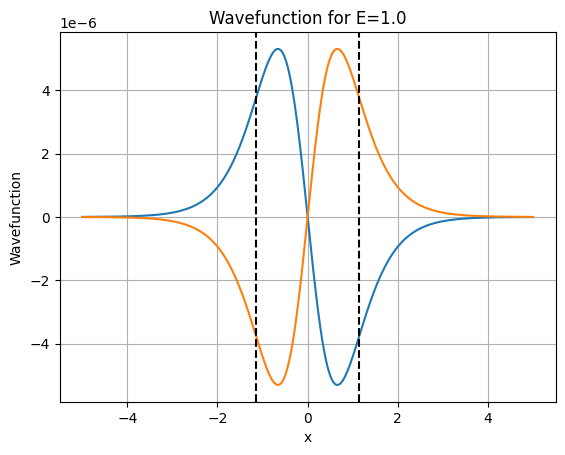

In [7]:
c,d=fsolve(g,[-L,L],args=(1.0))
psir=Numerov_Iteration(x,1.0)
psil=Numerov_Iteration(-x,1.0)

mpl.plot(x,psir)
mpl.plot(-x,psil)
mpl.axvline(c, color='k', linestyle='--')
mpl.axvline(d, color='k', linestyle='--')
mpl.xlabel('x')
mpl.ylabel('Wavefunction')
mpl.title('Wavefunction for E=1.0')
mpl.grid()
mpl.show()

Based on this graph that we have plotted, we can see that the wavefunction did satisfy both the conditions needed to be an eigenvalue. Also notice that the wavefunctions intercepted at $x=0$ and at $|x|=\infty$. However, to find the eigenvalues using the three point finite difference method earlier, we only checked for the boundary conditions at the turning points. Thus, we are unable to find $E=1$ as an eigenvalue earlier. So, based on the graph plotted, we can conclude that $E=1$ is indeed an eigenvalue.

Now, let's plot the wavefunction for $E=0.36$,

C:\Users\aayma\AppData\Local\Temp\ipykernel_22100\1314739755.py:14: RuntimeWarning: overflow encountered in square
  return hbar**2*alpha**2*lam*(lam-1)/(2*m)*(1/2-1/np.cosh(alpha*x)**2)


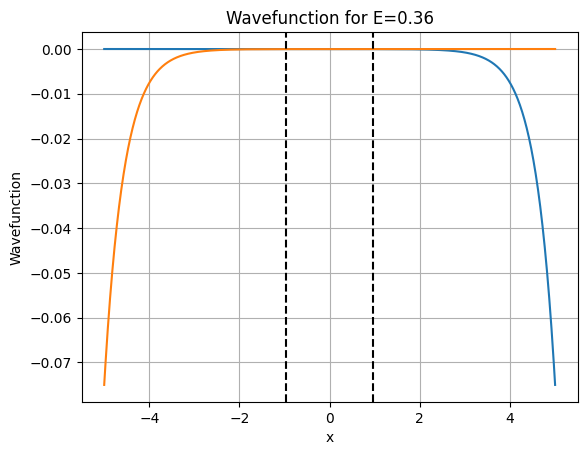

In [8]:
c,d=fsolve(g,[-L,L],args=(0.36))
psir=Numerov_Iteration(x,0.36)
psil=Numerov_Iteration(-x,0.36)

mpl.plot(x,psir)
mpl.plot(-x,psil)
mpl.axvline(c, color='k', linestyle='--')
mpl.axvline(d, color='k', linestyle='--')
mpl.xlabel('x')
mpl.ylabel('Wavefunction')
mpl.title('Wavefunction for E=0.36')
mpl.grid()
mpl.show()

We can observe that the the wavefunction does not approaches $0$, as $|x|$ approaches $\infty$. And the reason our bisection method computed $E=0.36$ earlier, is because the wavefunction coincidentally satisfy the boundary condition at the turning points. Thus, we can conclude that $E=0.36$ is not an eigenvalue.

Based on these 2 problems, we now know that to determine the eigenvalue, we will need to:
1) Check the boundary conditions for the whole domain.
2) Check for $\psi_{l,r}\rightarrow0$ as $|x|\rightarrow\infty$

Now, lets write some code to allow us to find the correct eigenvalues.

In [9]:
def check(psil,psir):
    min_old=100
    for i in range(1,len(x)-1):
        min_new=(psil[i+1]-psil[i-1])/(2*dx*psil[i]) - (psir[i+1]-psir[i-1])/(2*dx*psir[i])
        if min_new<min_old:
            min_old=min_new
    return min_old
   
def eigenval(E):
    psir=Numerov_Iteration(-x,E)
    psil=Numerov_Iteration(x,E)
    if abs(psil[-1])>1e-7:
        return 100
    elif abs(psir[-1])>1e-7:
        return 100
    else:
        return check(psil,psir)

def Find_Eigen(E1,E2):
    domain = np.arange(E1,E2,0.1)
    eigen = []
    print("The first 3 Eigenvalues:")
    for j in domain:
        if eigenval(j)<tol:
            eigen.append(round(j,2))
    return eigen

print(Find_Eigen(-3,3))


The first 3 Eigenvalues:
[-1.5, 1.0, 2.5]


However, the method to find eigenvalue above is quite unconventional, and takes a lot of time since we are calculating across the whole range of energy. But for now, since the code works just fine for the given potential, we can just use it.

Now, that we have obtained all the first 3 eigenvalues, lets plot them all,

C:\Users\aayma\AppData\Local\Temp\ipykernel_22100\1314739755.py:14: RuntimeWarning: overflow encountered in square
  return hbar**2*alpha**2*lam*(lam-1)/(2*m)*(1/2-1/np.cosh(alpha*x)**2)


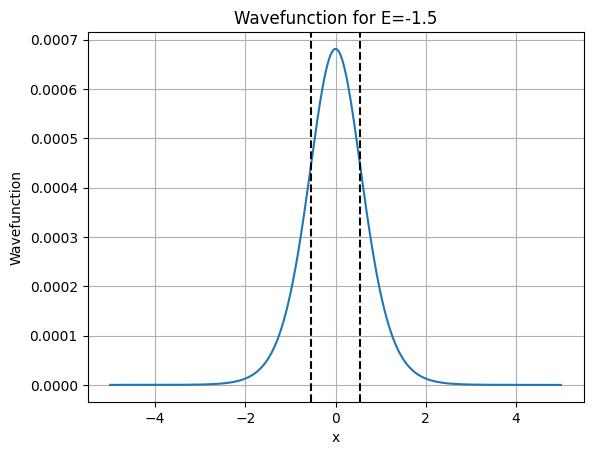

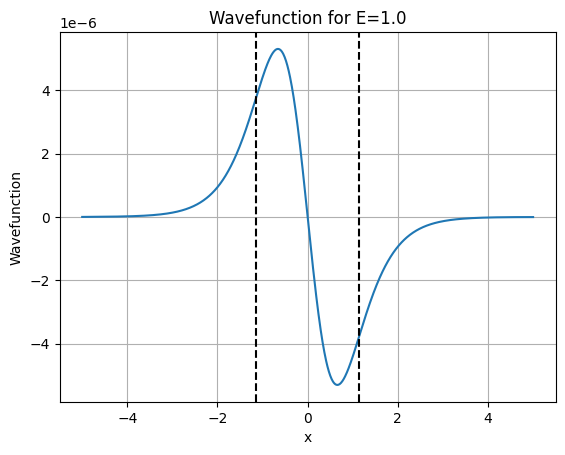

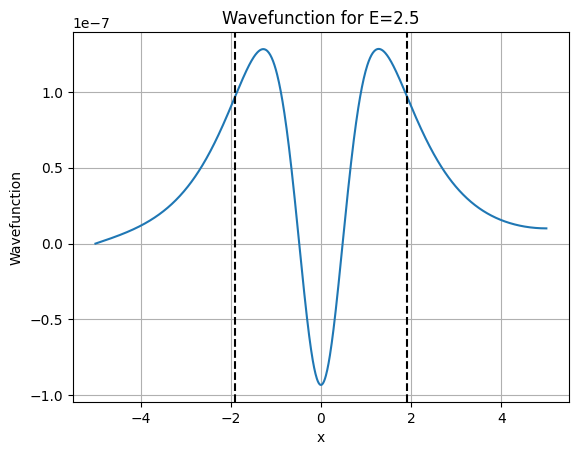

In [10]:
for i in range(3):
    mpl.plot(x,Numerov_Iteration(x,Etrue(i)))
    a,b=fsolve(g,[-L,L],args=(Etrue(i)))    
    mpl.axvline(a, color='k', linestyle='--')
    mpl.axvline(b, color='k', linestyle='--')
    mpl.xlabel('x')
    mpl.ylabel('Wavefunction')
    mpl.title('Wavefunction for E='+str(Etrue(i)))
    mpl.grid()
    mpl.show()

We can also plot all the eigenvalues and its corresponding wavefunction in the potential well to potray how the wavefunctions would look like for each eigenvalue energy level.

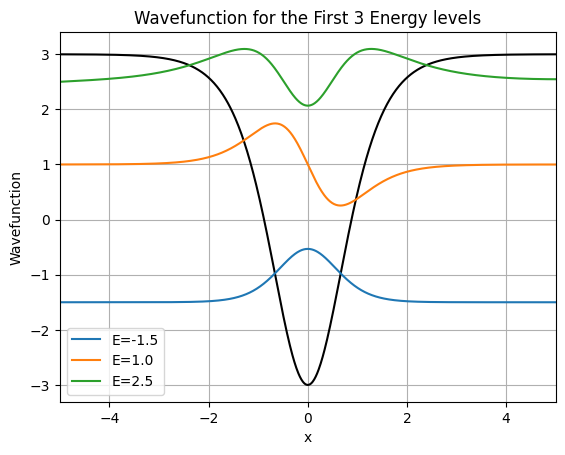

In [11]:
psi1 = Numerov_Iteration(x,Etrue(0))
psi2 = Numerov_Iteration(x,Etrue(1))
psi3 = Numerov_Iteration(x,Etrue(2))

#Normalization
def norm(psi):
    return 1/np.sqrt(np.sum(psi**2)*dx)

psi1 = psi1*norm(psi1)
psi2 = psi2*norm(psi2)
psi3 = psi3*norm(psi3)

mpl.plot(x,V(x),c='k')
mpl.plot(x,psi1+Etrue(0),label='E=-1.5')
mpl.plot(x,psi2+Etrue(1),label='E=1.0')
mpl.plot(x,psi3+Etrue(2),label='E=2.5')
mpl.xlabel('x')
mpl.xlim(-5,5)
mpl.ylabel('Wavefunction')
mpl.title('Wavefunction for the First 3 Energy levels')
mpl.legend()
mpl.grid()
mpl.show()

In conclusion, for a given potential function, we can find its corresponding eigenvalues using bisection method, then we can use Numerov method to iteratively solve and plot the shape of the corresponding wavefunction for each eigenvalue.

That is all for this project. There's definitely several sections in the coding that can be improvise to be more efficient, but let's save that for the next project when I am more experienced in Python. Thank you and stay safe <3.